# Assignment 3 Part 1: SA

### This notebook contains two sections: 

### 1. The first is a brief tutorial on building a simple sentiment analyser on some toy data and is not marked. 

### 2. The second section contains questions for you to answer and is marked.

Tutorial: Sentiment Analysis on some textual data
===

Introduction and setup
---

The purpose of this tutorial is to guide you through the construction of a very basic sentiment analysis tool.
We aim at detecting the polarity of a given text: is the attitude of the writer **positive** or **negative**.
Texts such as `'This view is amazing'` are considered positive, whereas text as `'This view is horrible'` will be considered negative. Such a tool can be useful, for example, to detect if products reviews are positive or negative.
The tool that we will construct starts from a very simple hypothesis: *it a text contains mainly positive words, then the general sentiment is positive; if the text contains mainly negative words, then the sentiment is negative*.

**Step 1:** For this purpose, we will use a sentiment lexicon: a list of words together with their polarity (*i.e.*, positive or negative).
We use the lexicon described in 
`Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, Washington, USA.`,
and available for [download here](http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html).  
  
In order to speed up this tutorial, we have downloaded the lexicon and pre-treated it (*i.e.*, we removed the header).
Save into your current folder the two lexicon files: `sentiment-lexicon-positive-words.txt` and `sentiment-lexicon-negative-words.txt` (available on Wattle).
Please note that some words in the lexicon are intentionally misspelled in order to accommodate common errors found in social media.

**Step 2:** We will require to verify if the words in the target text belong to the negative or to the positive lexicon.
For this, we use the Python's powerful [NLTK (Natural Language Toolkit) module](http://www.nltk.org/).
NLTK contains a comprehensive number of tools needed for natural text processing: tokenizers, stemmers, lemmatizers *etc.*
In the following, we will use a tokenizer (a tool which splits natural language text into tokens - words) and a lemmatizer (a tool to reduce a word to its lemma - singular, masculine form for nouns, infinitive for verbs *etc.*).

If you followed the installation instructions (or if you are working on a lab computer), the *nltk* module should already be installed, alongside with the additional required data that the tokenizer requires.
If you work on your own laptop, you need to download this additional data by executing the code below.
This will require a download of 23.3MB.  

In [1]:
import nltk

nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/blimmmmk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/blimmmmk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

We are now set up to start building our sentiment analysis tool.

Constructing a basic Sentiment Analysis tool
---

We start by initializing a set of positive and negative examples to work with. The examples were taken from [this sentiment analysis tutorial](http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/).

In [2]:
pos_tweets = [ 'I love this cars',
               'This view is amazing',
	           'I feel great this morning',
	           'I am so excited about the concert',
	           'He is my best friend']

neg_tweets = ['I do not like this car',
              'This view is horrible',
              'I feel tired this morning',
              'I am not looking forward to the concert',
              'He is my worst enemy']

Next, we import the positive and the negative lexicons.
The format of the lexicon files is one word per line.
As we will lemmatize the words in the target text, we apply the same treatment to the words in the lexicon.

In [3]:
from nltk.stem.wordnet import WordNetLemmatizer

# define the lemmatizer
lmtzr = WordNetLemmatizer()

# read the positive and negative lexicon in lists of words
positive_words = [lmtzr.lemmatize(line.strip()) for line in open('sentiment-lexicon-positive-words.txt')]
negative_words = [lmtzr.lemmatize(line.strip()) for line in open('sentiment-lexicon-negative-words.txt')]

print(f'We have {len(positive_words)} positive words and {len(negative_words)} negative words.')

We have 2006 positive words and 4783 negative words.


We are going to preprocess the target texts:
* the text is split into tokens (words) by using **nltk**;
* each token is transformed to lowercase;
* tokens are lemmatized;
* tokens with fewer than 3 characters are filtered out, since there are likely to be errors or non-sentiment related words.

In [4]:
for words in pos_tweets + neg_tweets:
    # tokenize and lemmatize the current tweet
    tokens = nltk.word_tokenize(words)
    tweet = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]
    
    # print the tweet
    print(tweet)

['love', 'this', 'car']
['this', 'view', 'amazing']
['feel', 'great', 'this', 'morning']
['excited', 'about', 'the', 'concert']
['best', 'friend']
['not', 'like', 'this', 'car']
['this', 'view', 'horrible']
['feel', 'tired', 'this', 'morning']
['not', 'looking', 'forward', 'the', 'concert']
['worst', 'enemy']


In the end, for each text we compute a score:
* if a given word is in the positive list, we add one to the score;
* if the word is in the negative list, we subtract one from the score.

In the end, if the score is greater than zero, the text is considered as positive. 
If it is less than zero, it is considered negative. 
If it is zero, the text is considered neutral.

The following code finds and outputs the positive and negative words in the texts. 
It computes the score and prints it out for each text.

In [5]:
# define the function that computes the sentiment score
def get_sentiment_score(text):
    # tokenize and lemmatize the current tweet
    tokens = nltk.word_tokenize(text)
    tweet = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]

    # calculate the sentiment score
    score = 0
    for word in tweet:
        if word in positive_words:
            score = score + 1
            #print "+1", word
        if word in negative_words:
            score = score - 1
            #print "-1", word
    
    return score

# apply it on our example tweets
for words in pos_tweets + neg_tweets:
    print(f'Tweet: "{words}", score: {get_sentiment_score(words)}')
    print('------------------------------------')

Tweet: "I love this cars", score: 1
------------------------------------
Tweet: "This view is amazing", score: 1
------------------------------------
Tweet: "I feel great this morning", score: 1
------------------------------------
Tweet: "I am so excited about the concert", score: 1
------------------------------------
Tweet: "He is my best friend", score: 1
------------------------------------
Tweet: "I do not like this car", score: 1
------------------------------------
Tweet: "This view is horrible", score: -1
------------------------------------
Tweet: "I feel tired this morning", score: -1
------------------------------------
Tweet: "I am not looking forward to the concert", score: 0
------------------------------------
Tweet: "He is my worst enemy", score: -2
------------------------------------


We observe that all the positive examples have been detected as positive, because they contain positive words.
Only 3 out of 5 negative examples were detected as such.
In the case of *'I do not like this car'*, the word **like** is in the positive list, but in the text it is prefixed by **not** which changes the polarity.
**like** is positive, but **not like** is negative.
*'I am not looking forward to the concert'* does not contain any positive or negative words, even if the expression **not looking forward** has a negative connotation.
This shows the limitations of our naive approach.
These special cases should be taken into account.

## Loading the Twitter dataset
To answer the assignment questions you will run your sentiment analyse on a dataset scraped from the Twitter API. This dataset is found in the twitter-dump.json.bz2 file, where each line is a single tweet.

This data can be loaded into a python dict as follows:

In [6]:
import bz2, json

with bz2.BZ2File("./twitter-dump.json.bz2", mode="r") as reader:
    jobj = [json.loads(line) for line in reader.readlines()]

# Remove tweets with duplicate text
unique_texts = set()
unique_tweets = []
for t in jobj:
    if t['text'] in unique_texts:
        continue
    unique_texts.add(t['text'])
    unique_tweets.append(t)
jobj = unique_tweets
    
sample = jobj[0]
print(json.dumps(sample, sort_keys=True, indent=4, separators=(',', ': ')))

{
    "YoutubeID": "iS1g8G_njx8",
    "_id": {
        "$oid": "5398013792ccfc23ee6f74c7"
    },
    "contributors": null,
    "coordinates": null,
    "created_at": {
        "$date": "2014-05-30T22:55:45.000+0200"
    },
    "entities": {
        "hashtags": [
            {
                "indices": [
                    70,
                    89
                ],
                "text": "WatchProblemOnVEVO"
            },
            {
                "indices": [
                    90,
                    103
                ],
                "text": "problemvideo"
            }
        ],
        "symbols": [],
        "urls": [
            {
                "display_url": "youtu.be/iS1g8G_njx8",
                "expanded_url": "http://youtu.be/iS1g8G_njx8",
                "indices": [
                    42,
                    64
                ],
                "url": "http://t.co/ji6ETHIFuf"
            }
        ],
        "user_mentions": [
            {
            

The meaning of the different fields are described [here](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object).
Let's take a look at some of the most important fields for our application:
* **created_at** - represents the date at each the tweet was emitted. Here: "2014-05-30T22:55:45.000+0200";
* **text** - is the actual text of the tweet. Here: "RT @ArianaGrande: here it is y'all ...... http://t.co/ji6ETHIFuf #WatchProblemOnVEVO #problemvideo";
* **user** - information about the user that emitted the tweet. The field that we will be using is **id**, the id of the user. Here: '2556502655';
* **in_reply_to_user_id** - the id of the user to which this tweets replies to. Here: null, hence this tweet is not a reply;
* **retweeted_status** - encloses the tweet that the current tweet retweets. Here: this tweet is a retweet;
* **YoutubeID** - the id of the Youtube video that the tweet is connected to. The text of the tweet contains a(n) (shortened) URL towards this video, such as 'iS1g8G_njx8'.

# <span style="color:blue"> Assignment Questions (5 marks): Applying the analysis on real Twitter data</span>

### Question 1 (1 point)

Use the `get_sentiment_score(text)`, the sentiment scoring function defined before, and calculate the sentiment polarity of the tweets in the Twitter JSON dataset (jobj). 
Print the text of the 10 most positive tweets and the 10 most negative tweets. 
We consider that a tweet $t_1$ is more positive than another tweet $t_2$ when score of the former is higher than the score of the latter ($score(t_1) > score(t_2)$). 
Similarly, a tweet $t_1$ is more negative than $t_2$ when $score(t_1) < score(t_2)$.  

In [7]:
# YOUR CODE HERE
# do we only count the score for text?
# jobj is a list of dictionary
#print(get_sentiment_score(sample['text']))
# create a dictionary : the score as key and a list of tweets with this score as value
score_dict = dict()
for tweet in jobj:
    t_score = get_sentiment_score(tweet['text'])
    # if the key is already existed, append it the id list
    if t_score in score_dict.keys():
        #score_dict.get(t_score).append(tweet['id'])
        score_dict.get(t_score).append(tweet['text'])
    else:
        # else, creat a new key with a new list
        score_dict[t_score] = [tweet['text']]
keys_reverse = list(score_dict.keys())
keys_reverse.sort(reverse=True)
num = 0
positive_ten = list()
for k in keys_reverse:
    for t in score_dict[k]:
        if num < 10:
            positive_ten.append(t)
            num+=1
print("Ten most positive tweets are:")
for element in positive_ten:
    print (element)
print("\n")   
keys = list(score_dict.keys())
keys.sort()
count = 0
negative_ten = list()
for key in keys:
    for t in score_dict[key]:
        if count < 10:
            negative_ten.append(t)
            count+=1
print("Ten most negative tweets are:")
for element in negative_ten:
    print ("Tweet ",element)


Ten most positive tweets are:
Watch @ArianaGrande and @iggyazalea Problem Official music video here 👩💭🎬 http://t.co/hSpUIH9eK6 love love love love love love love 💖💖💖💖😂
RT @PerrieAndSmile: It's perfect, Amazing, fantastic, WOW!💜I love u💕 http://t.co/dKDHDhdOgF
Please follow me gorgeous!👑@ArianaGrande 
#Watc…
It's perfect, Amazing, fantastic, WOW!💜I love u💕 http://t.co/dKDHDhdOgF
Please follow me gorgeous!👑@ArianaGrande 
#WatchProblemOnVEVO x56
It's perfect, Amazing, fantastic, WOW!💜I love u💕 http://t.co/dKDHDhdOgF
Please follow me gorgeous!👑@ArianaGrande 
#WatchProblemOnVEVO x87
It's perfect, Amazing, fantastic, WOW!💜I love u💕 http://t.co/dKDHDhdOgF
Please follow me gorgeous!👑@ArianaGrande 
#WatchProblemOnVEVO x88
RT @ArianaGrande: glad u love it.....👩 love u more “@indiggynado: @ArianaGrande it is PERFECT , i love you 💕
http://t.co/ji6ETHIFuf #WatchP…
@ArianaGrande i loved #problemvideo follow me i love you , makes me smile http://t.co/aXCrDVD51q   is the best   #WatchProblemOnVEVO x55

### Question 2 (1 point)

Based on the scores calculated in question 1, determine and print the id of the 3 most positive users. A user $u_1$ is more positive than a user $u_2$ if the dataset contains more positive tweets emitted by $u_1$ than tweets emitted by $u_2$. Formally:
$$ positivity(u_1) > positivity(u_2) \iff \left| \left\{ t \, \middle| \, author(t) = u_1 \wedge score(t) > 0 \right\} \right| > \left| \left\{ t \, \middle| \, author(t) = u_2 \wedge score(t) > 0 \right\} \right|$$

In [8]:
# In this dataset, some users have different format IDs, here is a function that converts them to an integer.
def get_id(id):
    if not isinstance(id, int):
        id = id['$numberLong']
    return id

# YOUR CODE HERE
# create a dictionary with key:id and value:total number of positive tweets
positive_dic = dict()
for tweet in jobj:
    ID = get_id(tweet['user']['id'])
    score = get_sentiment_score(tweet['text'])
    if score > 0:
        # if the key is already existed, increase 1
        if ID in positive_dic.keys():
            positive_dic[ID] += 1
        else:
            # else, create a key and set value to 1
            positive_dic[ID] = 1
positive_dic_sorted = sorted(positive_dic, key=positive_dic.get, reverse=True)
num = 0
print("The most 3 positive users are:")
for e in positive_dic_sorted:
    if num < 3:
        print("User ",e)
        num += 1

The most 3 positive users are:
User  1601537689
User  1243188937
User  2229663685


### Question 3 (1.5 points)

### Part A (1 points)

We have discussed earlier that our system is fragile to negations: it will score the expression *not beautiful* as positive because it only detects the word beautiful as positive. 
More generally, we consider that the token **not** changes the polarity of a given token: **not beautiful** becomes negative, while **not bad** becomes positive.  
Modify the function `get_sentiment_score(text)` to detect the changes of polarity due to the token **not**.

In [9]:
def get_negated_sentiment_score(text):
    tokens = nltk.word_tokenize(text)
    tweet = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]
    score = 0
    # first, consider the firse word
    if tweet[0] in positive_words:
        score = score + 1
    if tweet[0] in negative_words:
        score = score - 1
    for pre_word, word in zip(tweet,tweet[1:]):
        if word in positive_words:
            if pre_word == 'not':
                score = score - 1
            else:
                score = score + 1
        if word in negative_words:
            if pre_word == 'not':
                score = score + 1
            else:
                score = score - 1
    return score

### Part B (0.5 points)

Use the new get_negated_sentiment score to find the 3 most positive users, as in question 2. Do you get different users this time, compared to your results in question 2?

In [10]:
positive_dic = dict()
for t in jobj:
    ID = get_id(t['user']['id'])
    score = get_negated_sentiment_score(t['text'])
    if score > 0:
        # if the key is already existed, increase 1
        if ID in positive_dic.keys():
            positive_dic[ID] += 1
        else:
            # else, create a key and set value to 1
            positive_dic[ID] = 1
positive_dic_sorted = sorted(positive_dic, key=positive_dic.get, reverse=True)
num = 0
print("The most 3 positive users are:")
for e in positive_dic_sorted:
    if num < 3:
        print("User ",e)
        num += 1

The most 3 positive users are:
User  1601537689
User  1243188937
User  2229663685


### Question 4 (1.5 points)

Plot the temporal evolution of the counts of positive and negative tweets. The date a tweet was emitted is found in the field *created_at*. 
Divide the temporal extent of your dataset into 100 timeslices. 
The temporal extent of the dataset is from the creation date of the first tweet to the creation date of the last tweet. 
Count how many positive and how many negative tweets you have in each timeslice. 
Plot these counts on a graphic resembling this one:

![caption](files/desired-plot.png)  
**HINT:** the graphic above is not based on real data. Your actual curves might **NOT** look like this one. Its purpose is just to show you the expected form of the graphic.

**HINT:** the latest 3 tweets (3 tweets with the most recent created_at dates) are outlier dates and need to be removed, otherwise your plot will be highly skewed.

**You need to** produce two plots, one `using get_sentiment_score` and one using `get_negated_sentiment_score`.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

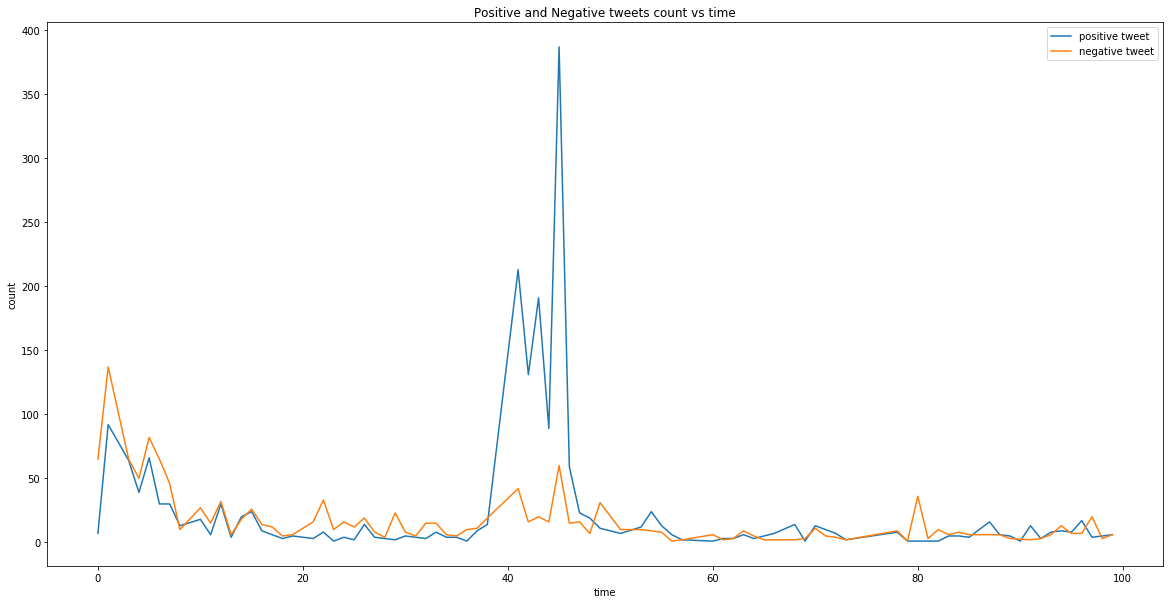

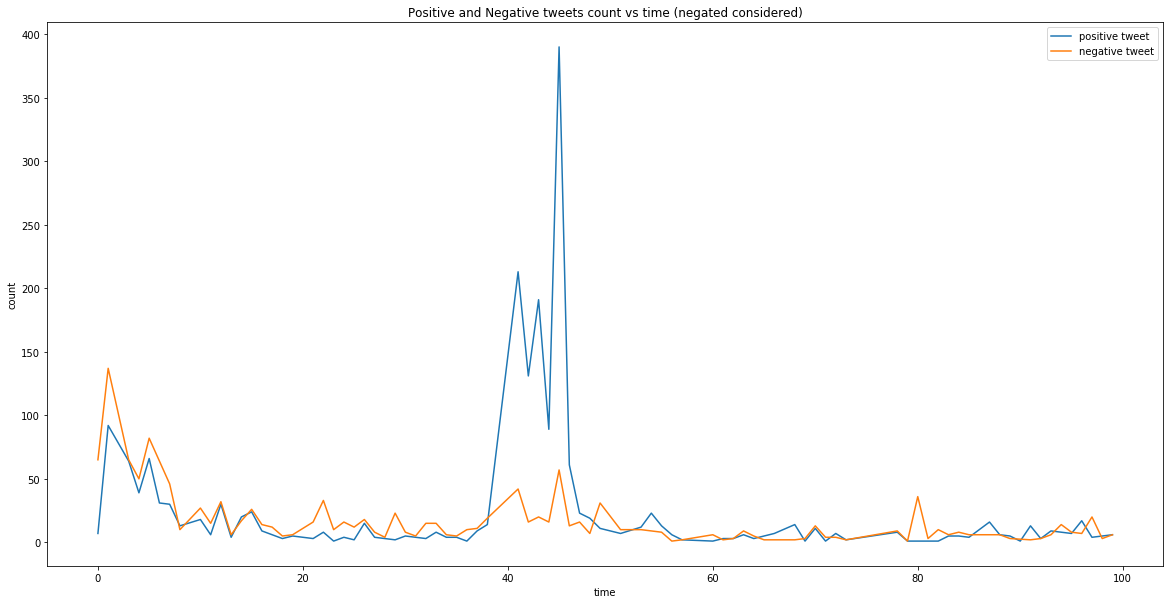

In [12]:
# Here is a function which converts date strings into datetime objects.
def get_date(date):
    date = datetime.strptime(date['$date'], '%Y-%m-%dT%H:%M:%S.%f+0200')
    return date
# Given a date, return a corresponding x-axis value
def return_point(date, time_list):
    for i in range(len(time_list)):
        if date < time_list[i]:
            return i

time_list = list()
# store the tweet time and tweet number for positive tweet
positive_dic = dict()
# store the tweet time and tweet number for negative tweet
negative_dic = dict()
# positive but counted by neg_count
positive_dic_neg = dict()
# negative but counted by neg_count
negative_dic_neg = dict()
for tweet in jobj:
    time = get_date(tweet['created_at'])
    if time not in time_list:
        time_list.append(time)
    score = get_sentiment_score(tweet['text'])
    score_neg = get_negated_sentiment_score(tweet['text'])
    # score > 0 is the positive, score < 0 is the negative
    if score > 0:
        if time in positive_dic.keys():
            positive_dic[time] += 1
        else:
            positive_dic[time] = 1
    if score < 0:
        if time in negative_dic.keys():
            negative_dic[time] += 1
        else:
            negative_dic[time] = 1
    if score_neg > 0:
        if time in positive_dic_neg.keys():
            positive_dic_neg[time] += 1
        else:
            positive_dic_neg[time] = 1
    if score_neg < 0:
        if time in negative_dic_neg.keys():
            negative_dic_neg[time] += 1
        else:
            negative_dic_neg[time] = 1 
time_list.sort()
starting_time = time_list[0]
time_list = time_list[:-3]
ending_time = time_list[-1]
unit = (ending_time - starting_time) / 100


times = list()
time_slot = starting_time
while time_slot < ending_time:
    time_slot += unit
    times.append(time_slot)



positive_draw = dict()
negative_draw = dict()
positive_neg_draw = dict()
negative_neg_draw = dict()
# time_list already removes the last three
for time in time_list:
    # change the time to corresponding x
    # modified_time = time - starting_time
    x_value = return_point(time, times)
    if time in positive_dic.keys():
        if x_value in positive_draw.keys():
            positive_draw[x_value] += positive_dic[time]
        else:
            positive_draw[x_value] = positive_dic[time]
    if time in negative_dic.keys():
        if x_value in negative_draw.keys():
            negative_draw[x_value] += negative_dic[time]
        else:
            negative_draw[x_value] = negative_dic[time]
    if time in positive_dic_neg.keys():
        if x_value in positive_neg_draw.keys():
            positive_neg_draw[x_value] += positive_dic_neg[time]
        else:
            positive_neg_draw[x_value] = positive_dic_neg[time]
    if time in negative_dic_neg.keys():
        if x_value in negative_neg_draw.keys():
            negative_neg_draw[x_value] += negative_dic_neg[time]
        else:
            negative_neg_draw[x_value] = negative_dic_neg[time]
x_p = list()
y_p = list()
x_n = list()
y_n = list()
for x,y in positive_draw.items():
    x_p.append(x)
    y_p.append(y)
for x,y in negative_draw.items():
    x_n.append(x)
    y_n.append(y)
x_p_neg = list()
y_p_neg = list()
x_n_neg = list()
y_n_neg = list()
for x,y in positive_neg_draw.items():
    x_p_neg.append(x)
    y_p_neg.append(y)
for x,y in negative_neg_draw.items():
    x_n_neg.append(x)
    y_n_neg.append(y)
    
plt.figure(figsize=(20,10))
plt.title ("Positive and Negative tweets count vs time")
plt.plot(x_p,y_p,label="positive tweet")
plt.plot(x_n,y_n,label="negative tweet")
plt.legend()
plt.xlabel("time")
plt.ylabel("count")
plt.show()

plt.figure(figsize=(20,10))
plt.title ("Positive and Negative tweets count vs time (negated considered)")
plt.plot(x_p_neg,y_p_neg,label="positive tweet")
plt.plot(x_n_neg,y_n_neg,label="negative tweet")
plt.legend()
plt.xlabel("time")
plt.ylabel("count")
plt.show()